In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\#DATA Science\NLP\NLP\UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [4]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

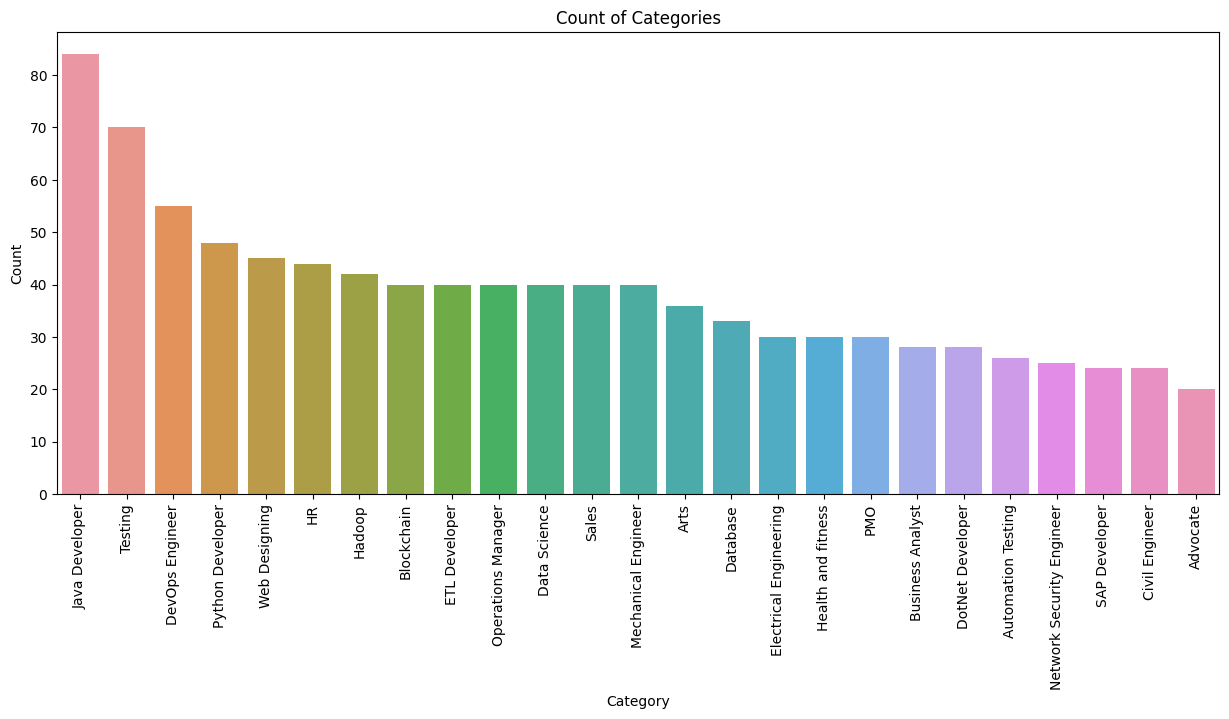

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

category_counts = df["Category"].value_counts()

plt.figure(figsize=(15, 6)) 
sns.countplot(data=df, x="Category", order=category_counts.index)
plt.xticks(rotation=90)  
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of Categories")
plt.show()



### Preprocessing

In [6]:
# Lowercasing
df["Resume"] = df["Resume"].str.lower()

In [7]:
import re
# Removing HTML tags if Resume is Bulit on Webpage
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

df["Resume"] =df['Resume'].apply(remove_html_tags)

In [8]:
# If It contains urls etc

def remove_urls(text):
    pattern = re.compile(r'\b(?:https?|ftp)://[^\s/$.?#].[^\s]*\b')
    return pattern.sub(r'',text)

df["Resume"] =df['Resume'].apply(remove_urls)

In [9]:
import string
string.punctuation
punctuations_are = string.punctuation

def remove_punctutation(text):          # just simple to remove puctuation marks
    for chars in punctuations_are:
        text = text.replace(chars, '')
    return text


df['Resume'] = df["Resume"].apply(remove_punctutation)

In [10]:
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def remove_stopwords_and_special_chars(text):
    # Remove special characters using regex
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Split the text into words
    words = text.split()
    
    # Remove stopwords and fill with spaces
    filtered_words = [word if word not in stop_words else " " for word in words]

    filtered_text = " ".join(filtered_words)

    return filtered_text

# Apply the function to the "Resume" column in your DataFrame
df["Resume"] = df["Resume"].apply(remove_stopwords_and_special_chars)


In [11]:
from nltk.tokenize import word_tokenize
tokens = df["Resume"].apply(word_tokenize)

In [35]:
skills_list = [
    "Python",
    "Java",
    "JavaScript",
    "C++",
    "SQL",
    "Data Analysis",
    "Machine Learning",
    "Deep Learning",
    "Artificial Intelligence (AI)",
    "Natural Language Processing (NLP)",
    "Data Mining",
    "Data Visualization",
    "Statistical Analysis",
    "Cloud Computing (e.g., AWS, Azure)",
    "DevOps",
    "Docker",
    "Kubernetes",
    "Web Development",
    "Mobile App Development",
    "Front-End Development",
    "Back-End Development",
    "Full-Stack Development",
    "Agile Methodology",
    "Scrum",
    "Project Management",
    "Leadership",
    "Teamwork",
    "Communication",
    "Problem Solving",
    "Critical Thinking",
    "Creativity",
    "UX/UI Design",
    "Cybersecurity",
    "Network Administration",
    "Database Management",
    "Big Data",
    "Internet of Things (IoT)",
    "Blockchain",
    "Robotics",
    "Automation",
    "Quality Assurance (QA)",
    "Technical Support",
    "Sales",
    "Marketing",
    "Content Writing",
    "Graphic Design",
    "Customer Service",
    "Financial Analysis",
    "Legal Knowledge",
    "Healthcare Management",
    "Pandas",
    "Numpy",
    "Matplotlib",
    "Seaborn",
    "Sklearn",
    "Algorithms"
]

In [14]:
import nltk

extracted_skills_per_resume = []

for resume_text in df["Resume"]:
    # Tokenize the resume text using NLTK
    tokens = nltk.word_tokenize(resume_text)
    
    # Extract skills that exist in the skills_list and are present in the resume
    skills = [skill.lower() for skill in skills_list if skill.lower() in [token.lower() for token in tokens]]
    
    extracted_skills_per_resume.append(skills)

# Add the extracted skills to your DataFrame
df["Extracted_Skills"] = extracted_skills_per_resume


In [15]:
df

,Category,Resume,Extracted_Skills
0,Data Science,skills programming languages python pandas num...,"[python, java, javascript, sql, docker, pandas..."
1,Data Science,education details may 2013 may 2017 uitrgp...,"[python, sklearn]"
2,Data Science,areas interest deep learning control system ...,"[python, java, sql, marketing]"
3,Data Science,skills r python sap hana tableau sap hana sql ...,"[python, sql, communication, marketing]"
4,Data Science,education details mca ymcaust faridabad haryan...,"[python, java]"
...,...,...,...
957,Testing,computer skills proficient ms office word ba...,[creativity]
958,Testing,willingness accept challenges positive thi...,[]
959,Testing,personal skills quick learner eagerness lear...,[leadership]
960,Testing,computer skills software knowledge mspower poi...,[]


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Category"] =  le.fit_transform(df["Category"])

In [17]:
print(len(df["Category"].unique()))
print(df["Category"].unique())

25
[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [19]:
BOW = cv.fit_transform(df["Resume"])

In [20]:
BOW

<962x7994 sparse matrix of type '<class 'numpy.int64'>'
	with 169514 stored elements in Compressed Sparse Row format>

In [21]:
BOW.shape

(962, 7994)

In [22]:
cv.vocabulary_

{'skills': 6615,
 'programming': 5615,
 'languages': 4069,
 'python': 5740,
 'pandas': 5162,
 'numpy': 4920,
 'scipy': 6359,
 'scikitlearn': 6357,
 'matplotlib': 4458,
 'sql': 6776,
 'java': 3878,
 'javascriptjquery': 3884,
 'machine': 4303,
 'learning': 4123,
 'regression': 5960,
 'svm': 7005,
 'nave': 4792,
 'bayes': 1012,
 'knn': 4008,
 'random': 5826,
 'forest': 3011,
 'decision': 2088,
 'trees': 7394,
 'boosting': 1145,
 'techniques': 7131,
 'cluster': 1523,
 'analysis': 647,
 'word': 7885,
 'embedding': 2534,
 'sentiment': 6462,
 'natural': 4788,
 'language': 4068,
 'processing': 5572,
 'dimensionality': 2272,
 'reduction': 5931,
 'topic': 7305,
 'modelling': 4635,
 'lda': 4103,
 'nmf': 4869,
 'pca': 5246,
 'neural': 4841,
 'nets': 4833,
 'database': 2021,
 'visualizations': 7726,
 'mysql': 4758,
 'sqlserver': 6787,
 'cassandra': 1330,
 'hbase': 3347,
 'elasticsearch': 2506,
 'd3js': 1999,
 'dcjs': 2059,
 'plotly': 5385,
 'kibana': 3994,
 'ggplot': 3178,
 'tableau': 7046,
 'other

In [23]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y , test_y  = train_test_split(BOW,df["Category"] ,test_size=0.2, random_state=41)

In [24]:
train_x.shape

(769, 7994)

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=41, n_estimators=50)
rf.fit(train_x, train_y)

RandomForestClassifier(n_estimators=50, random_state=41)

In [26]:
ypred = rf.predict(test_x)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(test_y, ypred)
print(accuracy_score)

0.9896373056994818


In [38]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

In [31]:
import pickle
pickle.dump(cv,open('cv.pkl','wb'))
pickle.dump(rf, open('clf.pkl', 'wb'))

In [40]:
import pickle
import re

clf = pickle.load(open('clf.pkl', 'rb'))
cv = pickle.load(open('cv.pkl', 'rb'))


def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

def extract_skills_from_resume(resume_text, skills_list):
    # Tokenize the resume text using NLTK
    tokens = nltk.word_tokenize(resume_text, language="english", preserve_line= "False")
    # Extract skills that exist in the skills_list and are present in the resume
    skills = [skill.lower() for skill in skills_list if skill.lower() in [token.lower() for token in tokens]]
    return skills



cleaned_resume = cleanResume(myresume)

skills = extract_skills_from_resume(myresume, skills_list)

input_features = cv.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)
print(skills)

Predicted Category: Data Science
6
['python', 'sql', 'communication', 'sklearn', 'algorithms']
